In [32]:

import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_2fe7195a196e4b339d6e287c9c4b00c9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ykqEbkw_JaBECNFN11YJErQRJnnqvwtJHLGg-uLwq-Ry',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_2fe7195a196e4b339d6e287c9c4b00c9.get_object(Bucket='kmeansclusteringalgorithm-donotdelete-pr-spmavkk7jh1g3x',Key='GENERAL.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [33]:
from sklearn import cluster
df.iloc[:,[1]].head(5)


,BALANCE
0,40.900749
1,3202.467416
2,2495.148862
3,1666.670542
4,817.714335


In [36]:
from sklearn import cluster
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm

from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

df = df.drop('CUST_ID',axis= 1)
df = df.dropna()  



In [37]:

%matplotlib inline
 
clustering = KMeans(n_clusters = 6, random_state = 5)
clustering.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

Text(0.5,1,'K-Means  Classification')

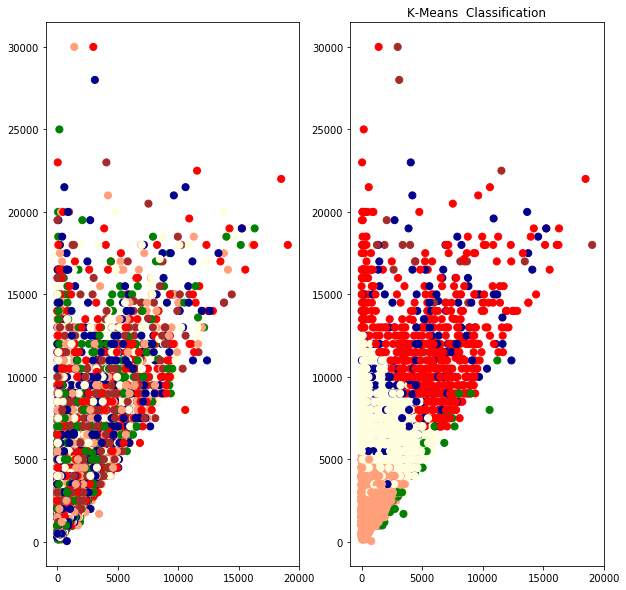

In [38]:
color_theme = np.array(['darkblue', 'lightsalmon', 'red', 'lightyellow', 'brown', 'green'])
plt.figure(figsize =(10,10))
plt.subplot(1,2,1)
plt.scatter(x=df['BALANCE'], y=df['CREDIT_LIMIT'], c = color_theme ,s=50)

plt.subplot(1,2,2)

plt.scatter(x = df['BALANCE'],y = df['CREDIT_LIMIT'] , c= color_theme[clustering.labels_], s=50 )
plt.title('K-Means  Classification')